# Generation model to generate song lyrics by artist name and genre

# Intialization

In [24]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('popular')
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Zeyad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Zeyad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Zeyad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Zeyad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Zeyad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [10]:
# Load the dataset
dataset = pd.read_csv("SpotifyDataset.csv")

In [11]:
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...


In [12]:
# Display the first few rows of the dataset
print(dataset.head())

# Get information about the dataset
print(dataset.info())

# Summary statistics of numerical columns
print(dataset.describe())

  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  
0  Look at her face, it's a wonderful face  \nAnd...  
1  Take it easy with me, please  \nTouch me gentl...  
2  I'll never know why I had to go  \nWhy I had t...  
3  Making somebody happy is a question of give an...  
4  Making somebody happy is a question of give an...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57

In [13]:
# Check for missing values
print(dataset.isnull().sum())  
# There are no missing values in the dataset

artist    0
song      0
link      0
text      0
dtype: int64


# Data Analysis

## Most Frequent Terms in Lyrics

In [32]:
#sampled_dataset = dataset.sample(n=2500, random_state=42)

# Concatenate all lyrics into a single string
all_lyrics = ' '.join(dataset['text'].dropna())

# Tokenize the text into words
tokens = word_tokenize(all_lyrics.lower().strip())

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english') + list(string.punctuation) + ['\n'])
filtered_tokens = [word for word in tokens if word not in stop_words and "'" not in word]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Get the most frequent words
most_common_words = word_freq.most_common(10)

print("Top 10 most frequent terms throughout the text column:")
for word, freq in most_common_words:
    print(f"{word}: {freq} occurrences")

Top 10 most frequent terms throughout the text column:
love: 93884 occurrences
know: 72493 occurrences
like: 63567 occurrences
got: 61045 occurrences
oh: 59719 occurrences
na: 48458 occurrences
one: 44699 occurrences
go: 43826 occurrences
time: 43530 occurrences
get: 43443 occurrences


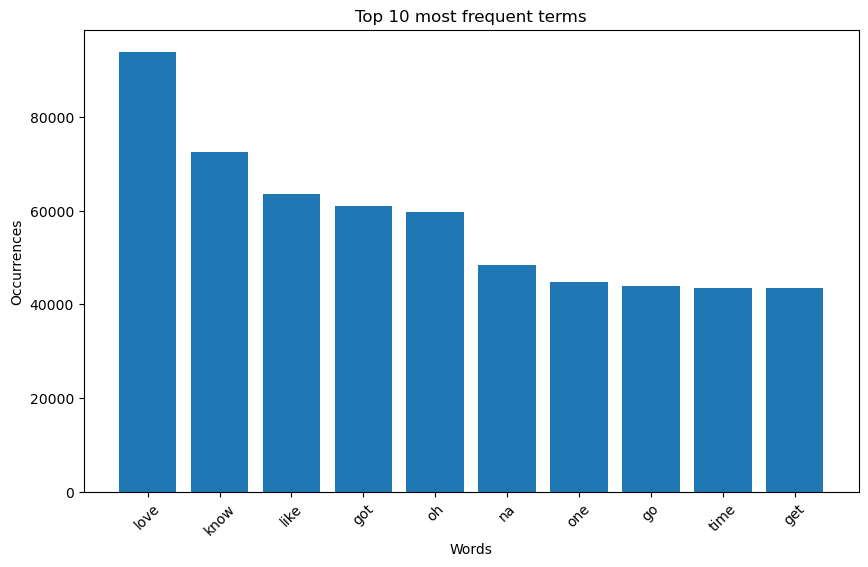

In [33]:
# Extract the words and frequencies from most_common_words
words = [word for word, _ in most_common_words]
frequencies = [freq for _, freq in most_common_words]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.title('Top 10 most frequent terms')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

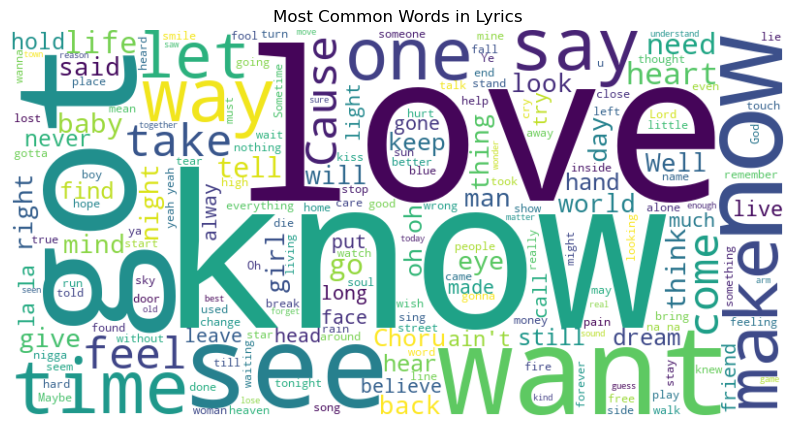

In [36]:
# Concatenate all lyrics into a single string
all_lyrics = ' '.join(dataset['text'].dropna())

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Lyrics')
plt.axis('off')
plt.show()

## Distribution of song lengths

In [ ]:
import seaborn as sns

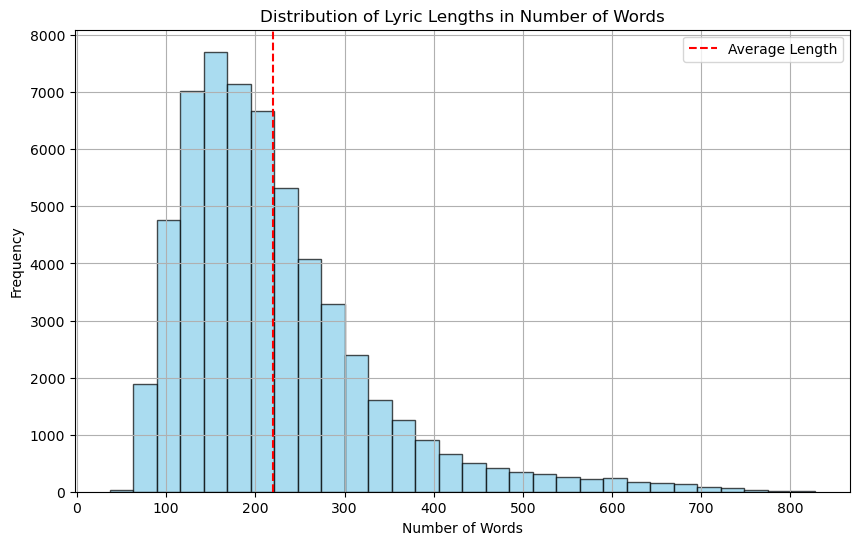

Average Lyric Length: 219.49 words


In [42]:
# Tokenize lyrics and calculate lyric lengths in number of words
lyric_lengths = dataset['text'].dropna().apply(lambda x: len(x.split()))

# Calculate the average lyric length
average_lyric_length = lyric_lengths.mean()

# Plot the distribution of lyric lengths
plt.figure(figsize=(10, 6))
plt.hist(lyric_lengths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(average_lyric_length, color='red', linestyle='dashed', linewidth=1.5, label='Average Length')
plt.title('Distribution of Lyric Lengths in Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

print(f"Average Lyric Length: {average_lyric_length:.2f} words")

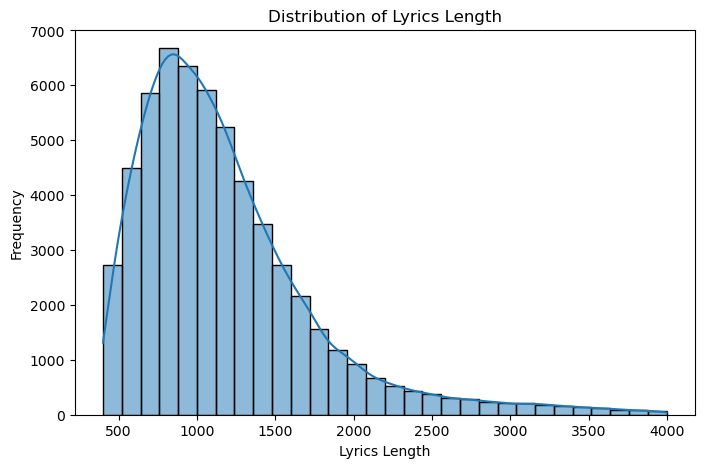

In [23]:
# Distribution of song lengths
dataset['Lyrics_Length'] = dataset['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Lyrics_Length'], bins=30, kde=True)
plt.title('Distribution of Lyrics Length')
plt.xlabel('Lyrics Length')
plt.ylabel('Frequency')
plt.show()

## Artist Contribution

Explore the contribution of different artists to the dataset. Analyze the number of songs per artist and visualize the top artists using a bar chart or word cloud

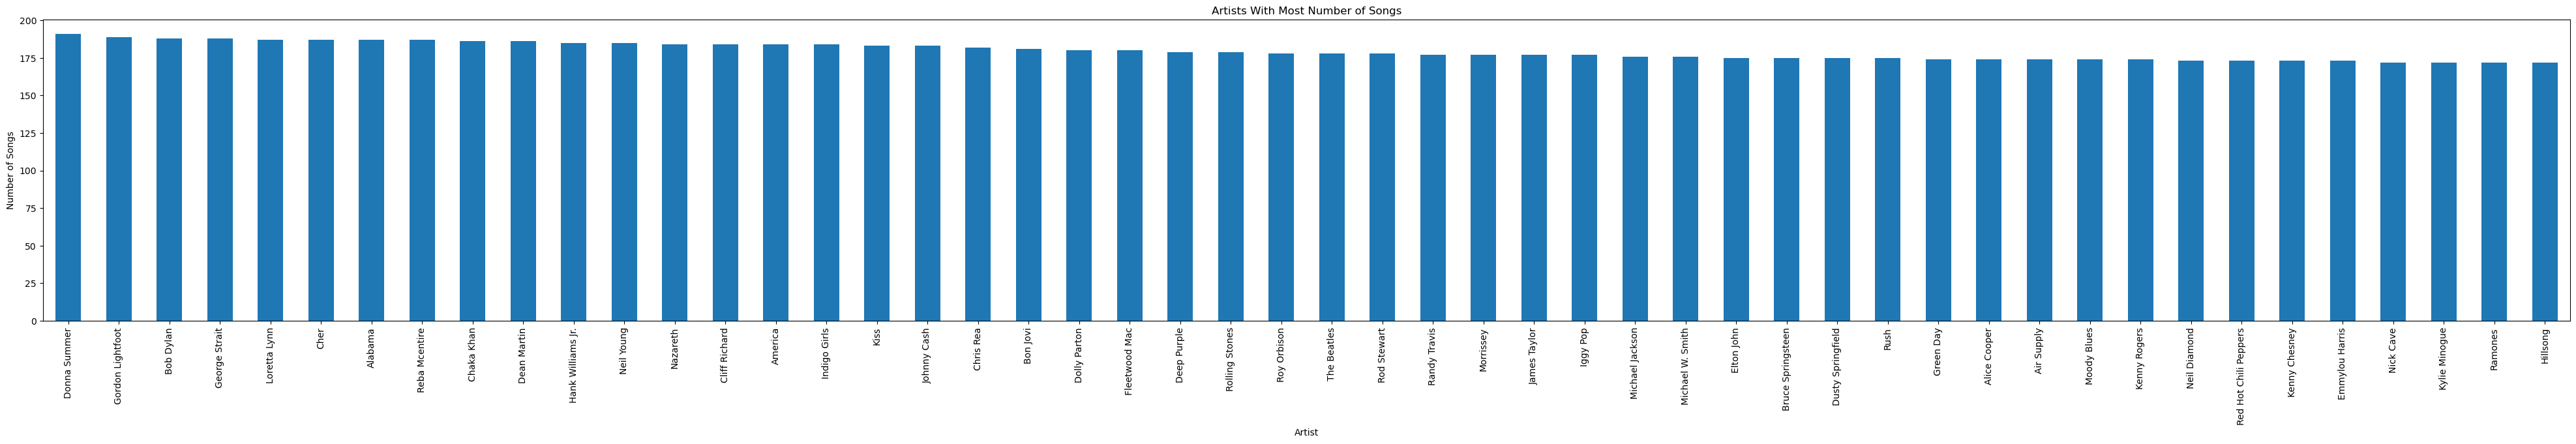

In [41]:
artist_counts = dataset['artist'].value_counts()

# Get top artists
top_artists = artist_counts[:50]

# Plot bar chart
plt.figure(figsize=(50, 6))
top_artists.plot(kind='bar')
plt.title('Artists With Most Number of Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.show()

In [17]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Load the dataset
file_path = 'SpotifyDataset.csv'
dataset = pd.read_csv(file_path)
dataset.drop(columns=['link'], inplace=True)  # Assuming there is a 'link' column to drop
dataset = dataset.drop_duplicates(subset=['artist', 'song'])
dataset = dataset.sample(frac=1.0, random_state=42)  # Shuffle the dataset
dataset = dataset.sample(frac=0.06, random_state=42)  # Take 1% 

# Clean lyrics to expand simple repetitions
def expand_repetitions(text):
    text = re.sub(r'\b(\w+)\s+x(\d+)\b', lambda m: ' '.join([m.group(1)] * int(m.group(2))), text)
    return text

dataset['text'] = dataset['text'].apply(expand_repetitions)

# Tokenize text
tokenizer = RegexpTokenizer(r'\w+')
tokens = []
for _, row in dataset.iterrows():
    tokens.extend(tokenizer.tokenize(row['text'].lower()))

unique_tokens = np.unique(tokens)
token_index = {token: i for i, token in enumerate(unique_tokens)}

# Create artist index
artists = dataset['artist'].unique()
artist_index = {artist: i for i, artist in enumerate(artists)}

# Prepare sequences
sequence_length = 5  # Number of words in each input sequence
step = 1  # Step size for sliding the window

def get_sequences(text, artist_id, token_index, sequence_length, step):
    sequences = []
    next_words = []
    artist_ids = []
    words = tokenizer.tokenize(text.lower())
    for i in range(0, len(words) - sequence_length, step):
        sequences.append([token_index[word] for word in words[i:i + sequence_length]])
        next_words.append(token_index[words[i + sequence_length]])
        artist_ids.append(artist_id)
    return sequences, next_words, artist_ids

input_sequences = []
next_words = []
artist_inputs = []

for _, row in dataset.iterrows():
    artist_id = artist_index[row['artist']]
    seqs, nexts, arts = get_sequences(row['text'], artist_id, token_index, sequence_length, step)
    input_sequences.extend(seqs)
    next_words.extend(nexts)
    artist_inputs.extend(arts)

# Convert to numpy arrays for training
X_seq = np.zeros((len(input_sequences), sequence_length), dtype=np.int32)
Y_seq = np.zeros((len(next_words), len(unique_tokens)), dtype=bool)
X_artist = np.array(artist_inputs)

for i, sequence in enumerate(input_sequences):
    X_seq[i] = sequence
    Y_seq[i, next_words[i]] = 1

# Model definition
text_input = Input(shape=(sequence_length,))
text_embedding = Embedding(input_dim=len(unique_tokens), output_dim=100, input_length=sequence_length)(text_input)
text_lstm = LSTM(128, return_sequences=True)(text_embedding)
text_lstm = Dropout(0.5)(text_lstm)
text_lstm = LSTM(128)(text_lstm)
text_lstm = Dropout(0.5)(text_lstm)

artist_input = Input(shape=(1,))
artist_embedding = Embedding(input_dim=len(artist_index), output_dim=50)(artist_input)
artist_embedding = Flatten()(artist_embedding)

concatenated = Concatenate()([text_lstm, artist_embedding])
output_layer = Dense(len(unique_tokens), activation='softmax')(concatenated)

model = Model(inputs=[text_input, artist_input], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.01), metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit([X_seq, X_artist], Y_seq, batch_size=128, epochs=7, shuffle=True, validation_split=0.1, callbacks=[early_stopping])

C:\Users\zezoa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/7
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 352s 62ms/step - accuracy: 0.0856 - loss: 6.3143 - val_accuracy: 0.1245 - val_loss: 5.9820
Epoch 2/7
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 349s 63ms/step - accuracy: 0.1250 - loss: 5.7344 - val_accuracy: 0.1253 - val_loss: 6.2179
Epoch 3/7
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 331s 60ms/step - accuracy: 0.1246 - loss: 5.8913 - val_accuracy: 0.1208 - val_loss: 6.5044
Epoch 4/7
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 334s 60ms/step - accuracy: 0.1213 - loss: 6.1407 - val_accuracy: 0.1148 - val_loss: 6.8735
Epoch 5/7
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 336s 60ms/step - accuracy: 0.1198 - loss: 6.3549 - val_accuracy: 0.1157 - val_loss: 6.9275
Epoch 6/7
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 336s 60ms/step - accuracy: 0.1185 - loss: 6.5022 - val_accuracy: 0.1118 - val_loss: 7.1643


In [18]:
import numpy as np

def generate_lyrics(start_text, artist_name, num_words=100):
    generated = []
    tokenized_input = tokenizer.tokenize(start_text.lower())[-sequence_length:]
    used_words = set(tokenized_input)  # Initialize set of used words with the input

    for _ in range(num_words):
        x_seq = np.array([[token_index.get(word, 0) for word in tokenized_input]])
        x_artist = np.array([artist_index[artist_name]])

        predictions = model.predict([x_seq, x_artist])[0]
        next_index = np.argmax(predictions)
        next_word = unique_tokens[next_index]

        # Check if the next word has been used, if so, find the next best unused word
        sorted_indices = np.argsort(predictions)[::-1]
        for index in sorted_indices:
            next_word = unique_tokens[index]
            if next_word not in used_words:
                break
        
        generated.append(next_word)
        used_words.add(next_word)  # Add the chosen word to the set of used words

        # Update the input sequence for the next prediction
        tokenized_input.append(next_word)
        tokenized_input = tokenized_input[-sequence_length:]

    return ' '.join(generated)

# Example usage to generate lyrics
output_lyrics = generate_lyrics("love", "The Beatles", 50)
print(output_lyrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━